<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods:  9. Initial-value problems
## Build-in `python` methods for system of initial-value systems
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we the build-in functions `odeint` and `solve_ivp`

from the `scipy`package to solve `initial-value problems`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# load own library
import numerics.change_fonts
numerics.change_fonts.change_fontsize()

Define a trajectory of a mass $m$ subject to **gravity** and **friction** in the $x$-$z$-plane:
$$
\begin{array}{rcl}
 \frac{d u}{dt} & = & - \frac{k}{m} |v| u \\
 \frac{d w}{dt} & = & -g - \frac{k}{m} |v| w \\
 \frac{d x}{dt} & = & u \\
 \frac{d z}{dt} & = & w
\end{array}
$$
Coordinates $(x,0,z)$ [m],
velocities $(u,0,w)$ [m/s],
mass $m$ [kg],
friction $k$ [kg/m],
gravitational acceleration $g$ [m/s$^2$].

Initial values for velocity and position.

In [2]:
yinitial = [20,20,0,0]

Start and end times ($a$, $b$) and number of steps $n$, stepsize $h$.

In [11]:
t = np.linspace(0.,4.,101)

----
## `odeint`

We define the right-hand side of the differential equation as function:

In [12]:
def rhs_odeint(y,t,k,m,g):
    '''
    #----------------------------------------------------------------------
    # right-hand side function rhs(x)
    #----------------------------------------------------------------------
    '''
    u = y[0]
    w = y[1]
    x = y[2]
    z = y[3]
    vabs = np.sqrt(u**2 + w**2)
    dudt = -k/m*vabs*u
    dwdt = -g-k/m*vabs*w
    dxdt = u
    dzdt = w
    dydt = np.array([dudt,dwdt,dxdt,dzdt]).flatten()
    return dydt

In [14]:
k = [0,0.001,0.005]
m = 0.5
g = 9.81

sol1 = scipy.integrate.odeint(rhs_odeint,yinitial,t,args=(k[0],m,g,))
sol2 = scipy.integrate.odeint(rhs_odeint,yinitial,t,args=(k[1],m,g,))
sol3 = scipy.integrate.odeint(rhs_odeint,yinitial,t,args=(k[2],m,g,))

#print(sol1)

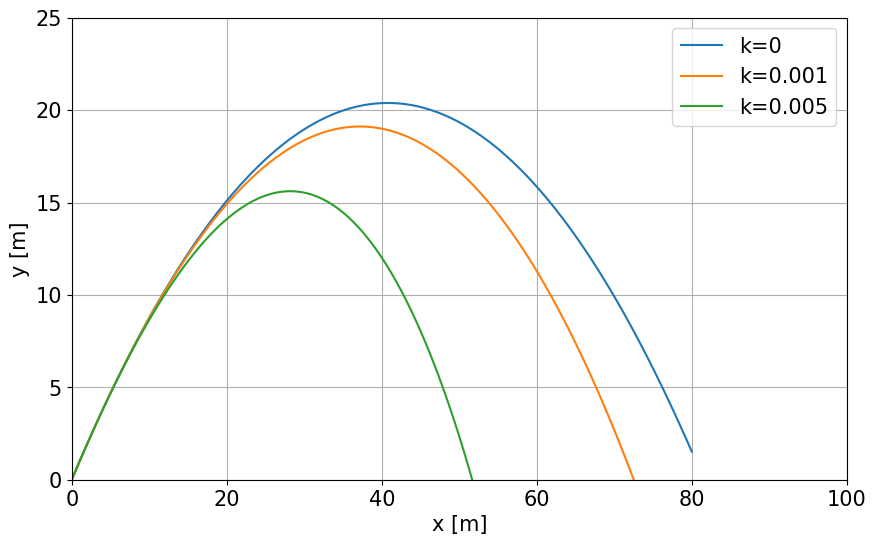

In [15]:
plt.figure(figsize=(10,6))
plt.xlim([0,100])
plt.ylim([0,25])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(sol1[:,2],sol1[:,3],label='k='+str(k[0]))
plt.plot(sol2[:,2],sol2[:,3],label='k='+str(k[1]))
plt.plot(sol3[:,2],sol3[:,3],label='k='+str(k[2]))
plt.grid()
plt.legend()

----
## `solve_ivp`


Note the different arrangement of arguments in list.

Also note the different handling of the integration limits.

And note the different return object...

In [16]:
def rhs_solve_ivp(t,y,k,m,g):
    '''
    #----------------------------------------------------------------------
    # right-hand side function rhs(x)
    #----------------------------------------------------------------------
    '''
    u = y[0]
    w = y[1]
    x = y[2]
    z = y[3]
    vabs = np.sqrt(u**2 + w**2)
    dudt = -k/m*vabs*u
    dwdt = -g-k/m*vabs*w
    dxdt = u
    dzdt = w
    dydt = np.array([dudt,dwdt,dxdt,dzdt]).flatten()
    return dydt

In [23]:
k = [0,0.001,0.005]
m = 0.5
g = 9.81

# test with automatic time steps
#sol1 = scipy.integrate.solve_ivp(rhs_solve_ivp,[t.min(),t.max()],yinitial,args=(k[0],m,g,))
#sol2 = scipy.integrate.solve_ivp(rhs_solve_ivp,[t.min(),t.max()],yinitial,args=(k[1],m,g,))
#sol3 = scipy.integrate.solve_ivp(rhs_solve_ivp,[t.min(),t.max()],yinitial,args=(k[2],m,g,))

sol1 = scipy.integrate.solve_ivp(rhs_solve_ivp,[t.min(),t.max()],yinitial,t_eval=t,args=(k[0],m,g,))
sol2 = scipy.integrate.solve_ivp(rhs_solve_ivp,[t.min(),t.max()],yinitial,t_eval=t,args=(k[1],m,g,))
sol3 = scipy.integrate.solve_ivp(rhs_solve_ivp,[t.min(),t.max()],yinitial,t_eval=t,args=(k[2],m,g,))

#print(sol1.y)

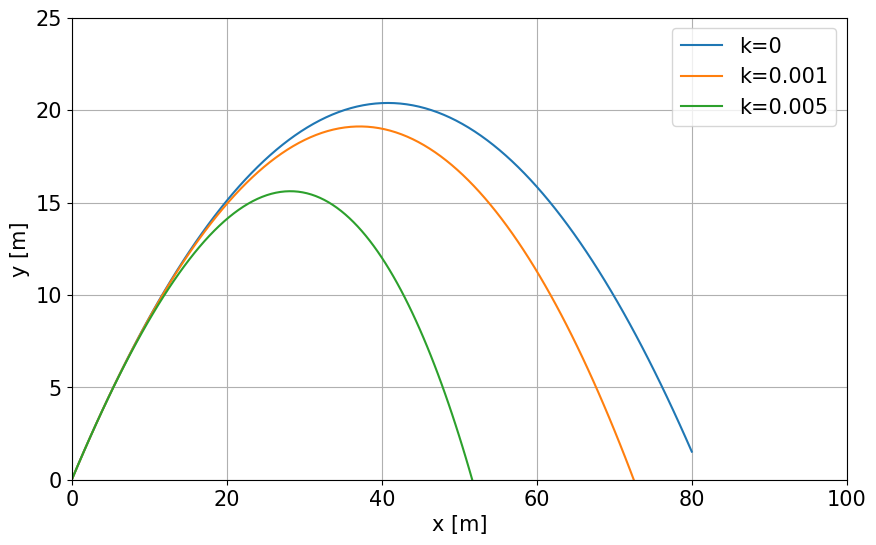

In [24]:
plt.figure(figsize=(10,6))
plt.xlim([0,100])
plt.ylim([0,25])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(sol1.y[2,:],sol1.y[3,:],label='k='+str(k[0]))
plt.plot(sol2.y[2,:],sol2.y[3,:],label='k='+str(k[1]))
plt.plot(sol3.y[2,:],sol3.y[3,:],label='k='+str(k[2]))
plt.grid()
plt.legend()

----